# ARIMA-SARIMA Forecast 

- Yahoo Stock

### Step 1: Import necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load and prepare the dataset

In [16]:
data = pd.read_csv('yahoo_stock.csv')
data

Date         High          Low         Open        Close  \
0     2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1     2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2     2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3     2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4     2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   
...          ...          ...          ...          ...          ...   
1820  2020-11-16  3628.510010  3600.159912  3600.159912  3626.909912   
1821  2020-11-17  3623.110107  3588.679932  3610.310059  3609.530029   
1822  2020-11-18  3619.090088  3567.330078  3612.090088  3567.790039   
1823  2020-11-19  3585.219971  3543.840088  3559.409912  3581.870117   
1824  2020-11-20  3581.229980  3556.850098  3579.310059  3557.540039   

            Volume    Adj Close  
0     3.587980e+09  2086.590088  
1     3.884930e+09  2089.139893  
2     2.852940e+09  2088.870117  
3     2.852940e+09  2088.870117  
4     1.466840e+09  2090.110107  
...            ...          ...  
1820  5.281980e+09  3626.909912  
1821  4.799570e+09  3609.530029  
1822  5.274450e+09  3567.790039  
1823  4.347200e+09  3581.870117  
1824  2.236662e+09  3557.540039  

[1825 rows x 7 columns]

In [17]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [25]:
stock_data = data['Close']
stock_data

Date
2015-11-23    2086.590088
2015-11-24    2089.139893
2015-11-25    2088.870117
2015-11-26    2088.870117
2015-11-27    2090.110107
                 ...     
2020-11-16    3626.909912
2020-11-17    3609.530029
2020-11-18    3567.790039
2020-11-19    3581.870117
2020-11-20    3557.540039
Name: Close, Length: 1825, dtype: float64

### Step 3: Split the data into training and testing sets

In [19]:
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

### Step 4: Train the ARIMA model

In [20]:
p, d, q = 1, 1, 1
model_arima = ARIMA(train, order=(p, d, q))
results_arima = model_arima.fit()

### Step 5: Forecast using the ARIMA model

In [31]:
forecast_arima = results_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
forecast_arima

2019-11-22    3103.802830
2019-11-23    3103.794236
2019-11-24    3103.794517
2019-11-25    3103.794508
2019-11-26    3103.794508
                 ...     
2020-11-16    3103.794508
2020-11-17    3103.794508
2020-11-18    3103.794508
2020-11-19    3103.794508
2020-11-20    3103.794508
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

In [36]:
# test

### Step 6: Train the SARIMA model

In [37]:
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12
model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results_sarima = model_sarima.fit()

### Step 7: Forecast using the SARIMA model

In [38]:
forecast_sarima = results_sarima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
forecast_sarima

2019-11-22    3104.020839
2019-11-23    3105.568435
2019-11-24    3107.091793
2019-11-25    3107.776242
2019-11-26    3110.420094
                 ...     
2020-11-16    3356.696019
2020-11-17    3357.887048
2020-11-18    3359.565798
2020-11-19    3360.321469
2020-11-20    3362.962783
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

In [39]:
# test

### Step 8: Plot the ARIMA and SARIMA forecasts

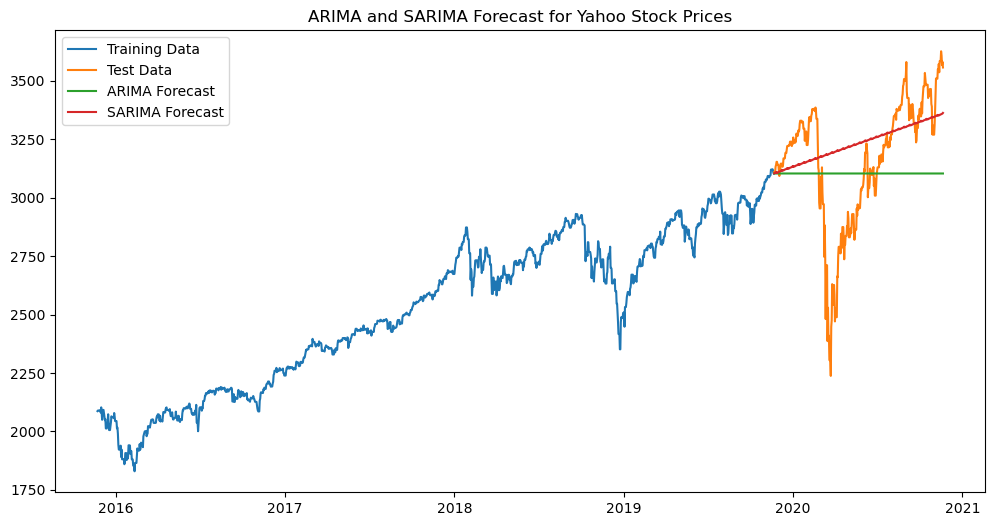

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('ARIMA and SARIMA Forecast for Yahoo Stock Prices')
plt.legend()
plt.show()